# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings

In [76]:
car = pd.read_csv('vehicles.csv')
car.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [86]:
car = pd.read_csv('vehicles.csv')
car.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [78]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [79]:
car.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [87]:
# Drop NAs, drop id, VIN

car = car.dropna()
car = car.drop(['id', 'VIN'], axis = 1)
car.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al


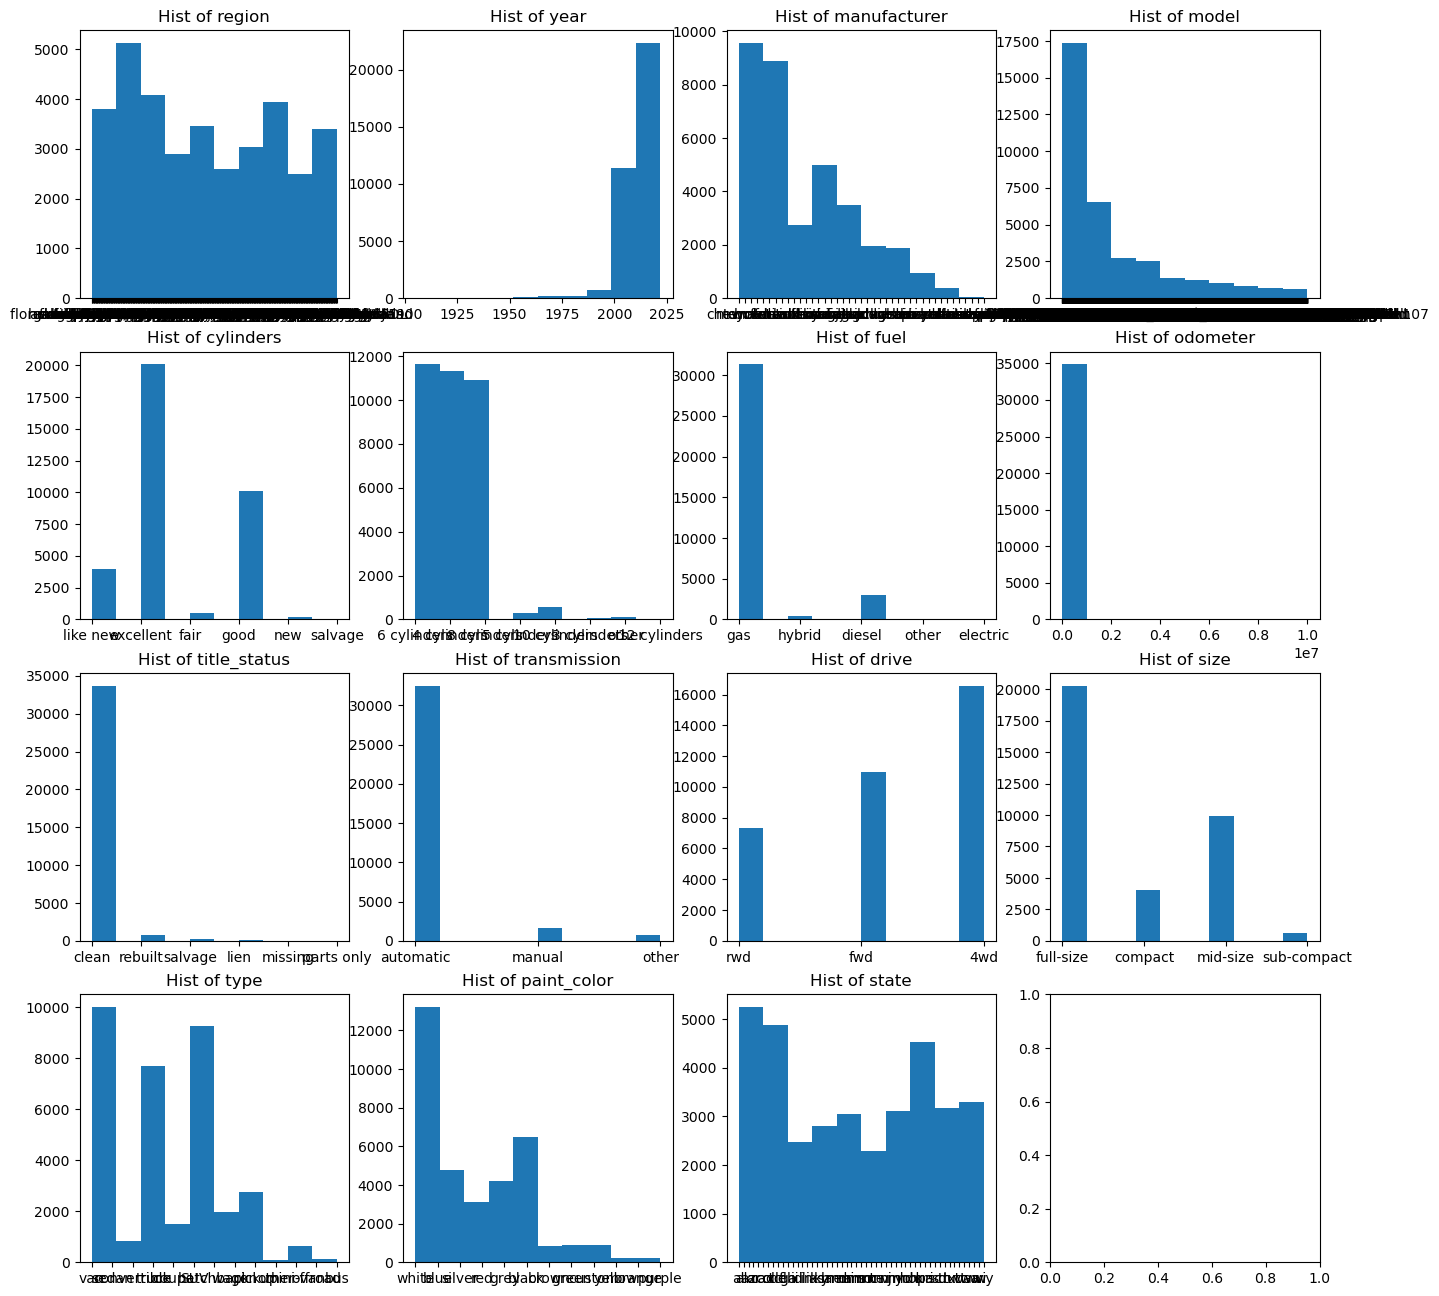

In [81]:
fig, ax = plt.subplots(4,4, figsize = [16,16])
ax[0,0].hist(car['region'])
ax[0,0].set_title('Hist of region')
ax[0,1].hist(car['year'])
ax[0,1].set_title('Hist of year')
ax[0,2].hist(car['manufacturer'])
ax[0,2].set_title('Hist of manufacturer')
ax[0,3].hist(car['model'])
ax[0,3].set_title('Hist of model')
ax[1,0].hist(car['condition'])
ax[1,0].set_title('Hist of condition')
ax[1,1].hist(car['cylinders'])
ax[1,0].set_title('Hist of cylinders')
ax[1,2].hist(car['fuel'])
ax[1,2].set_title('Hist of fuel')
ax[1,3].hist(car['odometer'])
ax[1,3].set_title('Hist of odometer')
ax[2,0].hist(car['title_status'])
ax[2,0].set_title('Hist of title_status')
ax[2,1].hist(car['transmission'])
ax[2,1].set_title('Hist of transmission')
ax[2,2].hist(car['drive'])
ax[2,2].set_title('Hist of drive')
ax[2,3].hist(car['size'])
ax[2,3].set_title('Hist of size')
ax[3,0].hist(car['type'])
ax[3,0].set_title('Hist of type')
ax[3,1].hist(car['paint_color'])
ax[3,1].set_title('Hist of paint_color')
ax[3,2].hist(car['state'])
ax[3,2].set_title('Hist of state')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2b255d350>,
 'caps': [<matplotlib.lines.Line2D at 0x2a2d962d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b1707790>],
 'medians': [<matplotlib.lines.Line2D at 0x2a2d94410>],
 'fliers': [<matplotlib.lines.Line2D at 0x32f32f6d0>],
 'means': []}

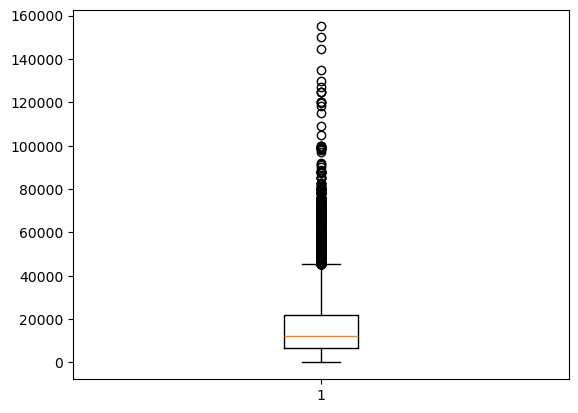

In [82]:
# Check price boxplot
plt.boxplot(car['price'])

(array([2.1094e+04, 9.2420e+03, 3.3940e+03, 8.5800e+02, 1.9100e+02,
        5.6000e+01, 1.7000e+01, 7.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([     0.,  15500.,  31000.,  46500.,  62000.,  77500.,  93000.,
        108500., 124000., 139500., 155000.]),
 <BarContainer object of 10 artists>)

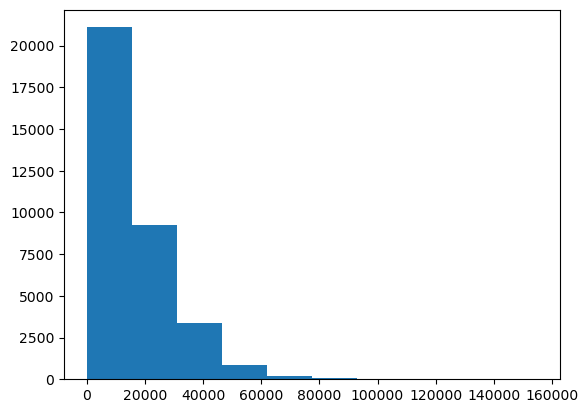

In [83]:
plt.hist(car['price'])

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [88]:
## Remove outliers

car = car[(car['price']> 1000) & (car['price']<= 70000)]
car.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
338,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al


In [89]:
## Since lots of columns are categorical data, so do a one-hot encoding for all of them. 
one_hot_encoded_data = pd.get_dummies(car, columns = ['region','year','manufacturer','model',
                                                        'condition','cylinders','fuel',
                                                        'title_status','transmission','drive',
                                                        'size', 'type', 'paint_color', 'state'
                                                      ])
one_hot_encoded_data.head()

,price,odometer,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
215,4000,155000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
219,2500,110661.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
268,9000,56700.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337,8950,164000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
338,4000,88100.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [90]:
one_hot_encoded_data.shape

(31427, 5501)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [91]:
train_X, test_X, train_y, test_y = train_test_split(one_hot_encoded_data.drop(['price'], axis = 1),one_hot_encoded_data['price'], test_size = 0.2)
train_X, test_X, train_y, test_y

(        odometer  region_SF bay area  region_abilene  region_akron / canton  \
 355495   73000.0               False           False                  False   
 343463  110449.0               False           False                  False   
 107235   33545.0               False           False                  False   
 389439  194959.0               False           False                  False   
 173731   61671.0               False           False                  False   
 ...          ...                 ...             ...                    ...   
 339958   98689.0               False           False                  False   
 267004  169700.0               False           False                  False   
 230957  144056.0               False           False                  False   
 310898   47980.0               False           False                  False   
 180505  104950.0               False           False                  False   
 
         region_albany  region_albuque

In [52]:
train_X.shape

(25109, 5495)

In [53]:
test_X.shape

(6278, 5495)

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [92]:
## Multiple Linear Regression
# Initiate Pipeline

pipe = Pipeline([
    ('Ploy', PolynomialFeatures(degree = 1, include_bias = False)),
    # ('scale', StandardScaler()),
    ('Ridge', Ridge(alpha = 1))
])

reg = pipe.fit(train_X, train_y)

In [93]:
train_preds = pipe.predict(train_X)
test_preds = pipe.predict(test_X)
train_MSE = mean_squared_error(train_preds, train_y)
test_MSE = mean_squared_error(test_preds, test_y)
print('Train_MSE: ', train_MSE)
print('Test_MSE: ', test_MSE)

Train_MSE:  17012429.583440233
Test_MSE:  25641160.676336687


In [94]:
reg.named_steps['Ridge'].coef_

array([-1.80865564e-02,  1.58132407e+03, -1.28748226e+03, ...,
       -5.20067593e+02, -2.35247589e+02,  6.72061814e+02])

In [95]:
df_features = pd.DataFrame({'Features': train_X.columns, 'coef':reg.named_steps['Ridge'].coef_})
df_features

,Features,coef
0,odometer,-0.018087
1,region_SF bay area,1581.324067
2,region_abilene,-1287.482263
3,region_akron / canton,-401.463127
4,region_albany,1789.746272
...,...,...
5495,state_vt,-583.165012
5496,state_wa,1574.329410
5497,state_wi,-520.067593
5498,state_wv,-235.247589


In [96]:
print("Model coefficients:\n")
for i in range(train_X.shape[1]):
    print(train_X.columns[i], "=", reg.named_steps['Ridge'].coef_[i].round(5))

Model coefficients:

odometer = -0.01809
region_SF bay area = 1581.32407
region_abilene = -1287.48226
region_akron / canton = -401.46313
region_albany = 1789.74627
region_albuquerque = -164.74417
region_altoona-johnstown = -149.43741
region_amarillo = 766.34731
region_ames = 625.01888
region_anchorage / mat-su = 2466.73913
region_ann arbor = -262.76969
region_annapolis = 876.63224
region_appleton-oshkosh-FDL = 1085.66595
region_asheville = -1412.43095
region_ashtabula = 3723.18158
region_athens = 1365.62434
region_atlanta = -764.13049
region_augusta = 2092.89558
region_austin = 431.53503
region_bakersfield = 1702.1504
region_baltimore = -327.53163
region_baton rouge = 1584.92335
region_battle creek = 134.74173
region_beaumont / port arthur = -629.7663
region_bellingham = -2845.82882
region_bemidji = 935.61334
region_bend = 2426.94709
region_billings = 333.11288
region_binghamton = -710.84698
region_birmingham = -941.8488
region_bismarck = 422.76041
region_bloomington = 68.9477
region_b

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [97]:
# Shapley values to see which features are more important

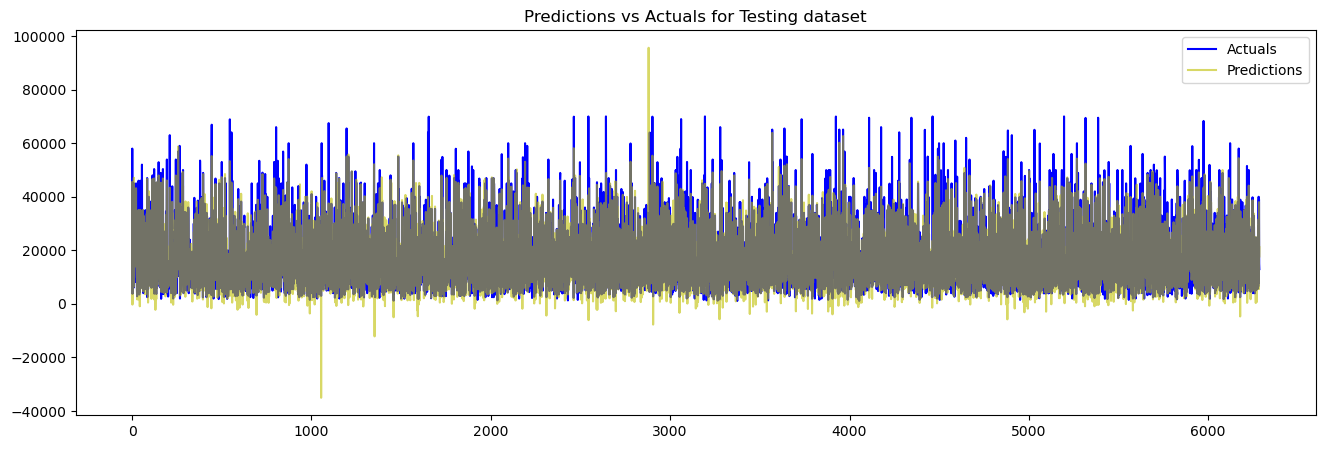

In [98]:
ax = plt.subplots(1,1,figsize= (16,5))
plt.plot(range(0,len(test_y)), test_y.values, 'blue', label = 'Actuals')
plt.plot(range(0,len(test_preds)), test_preds, 'y', label = 'Predictions', alpha=0.6)
plt.title('Predictions vs Actuals for Testing dataset')
plt.legend()

In [ ]:
# pip install --upgrade pyspark
# pip install shap
# Shapley Values
# Reference: Using SHAP Values for Model Interpretability in Machine Learning
# https://www.kdnuggets.com/2023/08/shap-values-model-interpretability-machine-learning.html#:~:text=Specifically%2C%20SHAP%20values%20are%20calculated,each%20sample%20in%20the%20dataset.


In [ ]:
import shap
shap.initjs()

In [102]:
# Calculate SHAP values
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.LinearExplainer.html
# https://snyk.io/advisor/python/shap/functions/shap.LinearExplainer
explainer = shap.LinearExplainer(reg.named_steps['Ridge'],test_X)
shap_values = explainer.shap_values(test_X)
shap_values

array([[103.43954804676659, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [2128.1210152861136, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [-1136.176853025648, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       ...,
       [1523.3246565440952, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [603.2615335677357, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [58.96470591193529, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0]],
      dtype=object)

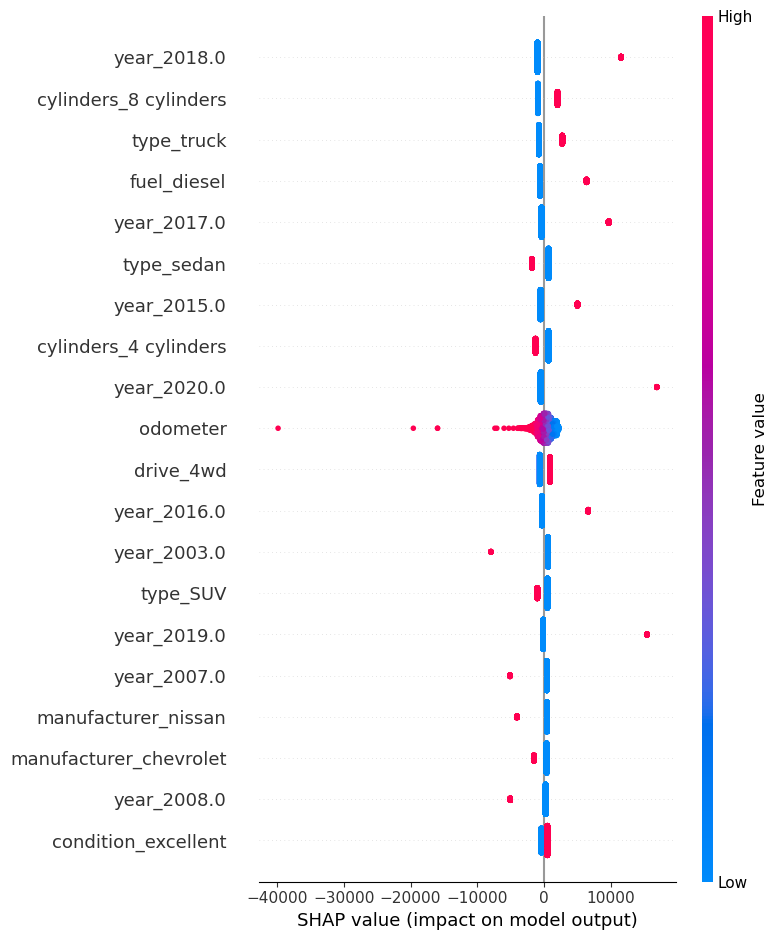

In [103]:
# Summarize the effects of features
# shap.summary_plot(shap_values, np.exp(test_X.values.astype(float)))
# feature_list = ['odometer']
shap_values = explainer.shap_values(test_X)
shap.summary_plot(shap_values.astype(float), test_X.astype(float))

In [104]:
shap.force_plot(explainer.expected_value, shap_values[0], feature_names = test_X.columns)

In [105]:
shap_values

array([[103.43954804676659, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [2128.1210152861136, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [-1136.176853025648, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       ...,
       [1523.3246565440952, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [603.2615335677357, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0],
       [58.96470591193529, 0.0, -0.0, ..., 26.00337965274207, -0.0, 0.0]],
      dtype=object)

In [106]:
explainer.expected_value

16571.16105540494

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Conclusion

In this blog post, we have introduced SHAP values, a method for explaining the output of machine learning models. We have shown how SHAP values can be used to explain individual predictions and the overall performance of a model. We have also provided examples of how SHAP values can be used in practice.

As machine learning expands into sensitive domains like healthcare, finance, and autonomous vehicles, interpretability and explainability will only grow in importance. SHAP values offer a flexible, consistent approach to explaining predictions and model behavior. It can be used to gain insights into how the models make predictions, identify potential biases, and improve the models' performance.

In [ ]:
# Year, Condition, Drive are the top 3 feature to predict high price, more newly with good condition and drive 4wd will predict a higher value. 

In [ ]:
# Model, Type, cylinders are the top 3 featuere to predict low price, terrain sle and SUV and more older versions will predict a lower value. 